In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from datasets import load_dataset
dataset = load_dataset("Skelebor/book_titles_and_descriptions_en")
dataset

dataset_infos.json: 0.00B [00:00, ?B/s]

(…)-00000-of-00003-389076496b9affab.parquet:   0%|          | 0.00/317M [00:00<?, ?B/s]

(…)-00001-of-00003-5a920ec35a84d6d1.parquet:   0%|          | 0.00/317M [00:00<?, ?B/s]

(…)-00002-of-00003-5ea1d6110260d131.parquet:   0%|          | 0.00/317M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1556211 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['title', 'description'],
        num_rows: 1556211
    })
})

In [3]:
print(dataset["train"][0])

{'title': 'Good Harbor', 'description': 'Anita Diamant\'s international bestseller "The Red Tent" brilliantly re-created the ancient world of womanhood. Diamant brings her remarkable storytelling skills to "Good Harbor" -- offering insight to the precarious balance of marriage and career, motherhood and friendship in the world of modern women. The seaside town of Gloucester, Massachusetts is a place where the smell of the ocean lingers in the air and the rocky coast glistens in the Atlantic sunshine. When longtime Gloucester-resident Kathleen Levine is diagnosed with breast cancer, her life is thrown into turmoil. Frightened and burdened by secrets, she meets Joyce Tabachnik -- a freelance writer with literary aspirations -- and a once-in-a-lifetime friendship is born. Joyce has just bought a small house in Gloucester, where she hopes to write as well as vacation with her family. Like Kathleen, Joyce is at a fragile place in her life.\nA mutual love for books, humor, and the beauty of 

In [4]:
import pandas as pd

df = pd.DataFrame(dataset["train"])
print(f"Total samples: {len(df)}")
print(f"Average title length: {df['title'].str.len().mean()}")
print(f"Average description length: {df['description'].str.len().mean()}")

Total samples: 1556211
Average title length: 34.18659049871162
Average description length: 860.7035594787596


In [5]:
df.isnull().sum()

title          1
description    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556211 entries, 0 to 1556210
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   title        1556210 non-null  object
 1   description  1556211 non-null  object
dtypes: object(2)
memory usage: 23.7+ MB


In [7]:
# Drop rows with missing titles or descriptions
cleaned_df = df.dropna(subset=["title", "description"])

# Reset index after removal
cleaned_df = cleaned_df.reset_index(drop=True)

# Verify removal
print(f"Original size: {len(df)} | Cleaned size: {len(cleaned_df)}")

Original size: 1556211 | Cleaned size: 1556210


In [8]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556210 entries, 0 to 1556209
Data columns (total 2 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   title        1556210 non-null  object
 1   description  1556210 non-null  object
dtypes: object(2)
memory usage: 23.7+ MB


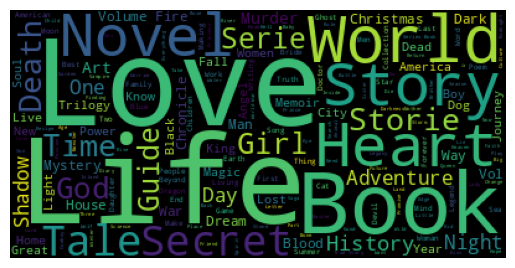

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

titles_text = " ".join(cleaned_df["title"])
wordcloud = WordCloud().generate(titles_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [10]:
# 1. Filter descriptions with <= 64 words
cleaned_df = cleaned_df[
    cleaned_df["description"].apply(lambda desc: len(str(desc).split()) <= 64)]
cleaned_df.iloc[3]

title                                          The Tommyknockers
description    Unabridged CDs, 25 CDs, 30 hours\nRead by TBA\...
Name: 12, dtype: object

In [11]:
cleaned_df = cleaned_df.head(80_000)

In [12]:
cleaned_df

,title,description
1,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",Omnibus book club edition containing the Ladie...
3,The Aeneid for Boys and Girls,"Relates in vigorous prose the tale of Aeneas, ..."
6,The Devil's Notebook,"Wisdom, humor, and dark observations by the fo..."
12,The Tommyknockers,"Unabridged CDs, 25 CDs, 30 hours\nRead by TBA\..."
14,"The Passion (Dark Visions, #3)",This is the final tale in the bestselling auth...
...,...,...
445548,The Tavern in the Morning (Hawkenlye Mysteries...,A man from London has taken over the tavern on...
445556,Kate of Clyve Shore,The title story tells of a village girl in Ken...
445559,Cells; Student Text,"This a ""consumable"" student booklet for use wi..."
445560,Mr. Perfect,Lex is bored at a Live Action Role Play bar ga...


In [13]:
import re
# Combined preprocessing function
def preprocess_text(text):
    if pd.isna(text):  # Handle NaN values
        return ""
    
    # Convert to string (in case of non-string inputs)
    text = str(text)
    
    # 1. Remove newlines and extra spaces
    text = re.sub(r"\n", " ", text)  # Replace newlines with spaces
    text = re.sub(r"\s+", " ", text)  # Replace multiple spaces with a single space
    
    # 2. Remove special characters (keep alphanumeric, spaces, and basic punctuation)
    text = re.sub(r"[^a-zA-Z0-9\s.,!?]", "", text)
    
    # 3. Convert to lowercase
    text = text.lower()
    
    # 4. Trim leading/trailing whitespace
    text = text.strip()
    
    return text

# Apply preprocessing to title and description columns
cleaned_df["title"] = cleaned_df["title"].apply(preprocess_text)
cleaned_df["description"] = cleaned_df["description"].apply(preprocess_text)

In [14]:
print("Sample preprocessed titles:")
print(cleaned_df["title"].head())
print("\nSample preprocessed descriptions:")
print(cleaned_df["description"].head())

Sample preprocessed titles:
1     the unschooled wizard sun wolf and starhawk, 12
3                       the aeneid for boys and girls
6                                 the devils notebook
12                                  the tommyknockers
14                        the passion dark visions, 3
Name: title, dtype: object

Sample preprocessed descriptions:
1     omnibus book club edition containing the ladie...
3     relates in vigorous prose the tale of aeneas, ...
6     wisdom, humor, and dark observations by the fo...
12    unabridged cds, 25 cds, 30 hours read by tba b...
14    this is the final tale in the bestselling auth...
Name: description, dtype: object


In [15]:
train_df = cleaned_df.iloc[:60_000]
val_df = cleaned_df.iloc[60_000:70_000]
test_df = cleaned_df.iloc[70_000:80_000]

In [16]:
print(f"Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

Train: 60000, Val: 10000, Test: 10000


In [17]:
from transformers import T5ForConditionalGeneration, T5Tokenizer, Seq2SeqTrainingArguments, Seq2SeqTrainer
from datasets import Dataset

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [18]:
# Load the T5 tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-base")

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [19]:
# Tokenize the dataset
def tokenize_data(examples):
    # Prefix descriptions with "generate title: " for T5
    inputs = ["generate title: " + desc for desc in examples["description"]]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding="max_length")

    # Tokenize titles as labels
    labels = tokenizer(examples["title"], max_length=32, truncation=True, padding="max_length").input_ids
    model_inputs["labels"] = labels

    return model_inputs

In [20]:
# Convert Pandas DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Tokenize the datasets
train_dataset = train_dataset.map(tokenize_data, batched=True)
val_dataset = val_dataset.map(tokenize_data, batched=True)
test_dataset = test_dataset.map(tokenize_data, batched=True)

Map:   0%|          | 0/60000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [21]:
# Load the T5 model
model = T5ForConditionalGeneration.from_pretrained("t5-base")
# model.gradient_checkpointing_enable()

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [22]:
training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="steps",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    save_strategy="steps",
    save_total_limit=2,
    logging_dir="./logs",
    report_to="none",
    eval_steps=500,
    save_steps=500,
    load_best_model_at_end=True,
    logging_steps=100,
    fp16=True,  # Mixed-precision training for speed
    predict_with_generate=True,  # Enables seq2seq generation
    generation_max_length=32,  # Max length of generated titles
    generation_num_beams=5  # Beam search for better results
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [23]:
# training_args = Seq2SeqTrainingArguments(
#     output_dir="./results",
#     evaluation_strategy="steps",
#     learning_rate=3e-5,
#     per_device_train_batch_size=8,  # Increased if hardware allows
#     per_device_eval_batch_size=8,
#     num_train_epochs=3,  # Increased to allow for more training
#     weight_decay=0.005,  # Reduced
#     save_strategy="steps",
#     save_total_limit=2,  # Increased to keep more checkpoints
#     logging_dir="./logs",
#     report_to="none",
#     eval_steps=500,
#     save_steps=500,
#     load_best_model_at_end=True,
#     logging_steps=100,
#     fp16=True,
#     predict_with_generate=True,
#     generation_max_length=32,
#     generation_num_beams=8,  # Increased
#     warmup_steps=1000,  # Added warmup
#     optim="adamw_torch",  # Specified optimizer
#     gradient_accumulation_steps=2,  # Added gradient accumulation
#     metric_for_best_model="eval_loss",  # Explicitly set metric
#     greater_is_better=False,  # For loss, lower is better
# )

In [24]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=b022b81d995925d97659bf2493e805936a32cf06e870fa0bab53d333b5b279d6
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [25]:
from rouge_score import rouge_scorer
import torch
# Initialize ROUGE scorer
rouge_scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)

def compute_rouge_metrics(eval_pred):
    predictions, labels = eval_pred

    # Move predictions and labels to CPU
    predictions = predictions.cpu()
    labels = labels.cpu()
    
    # Decode predictions and labels
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Compute ROUGE scores
    rouge1_scores = []
    rouge2_scores = []
    rougeL_scores = []

    for pred, label in zip(decoded_preds, decoded_labels):
        scores = rouge_scorer.score(label, pred)
        rouge1_scores.append(scores["rouge1"].fmeasure)
        rouge2_scores.append(scores["rouge2"].fmeasure)
        rougeL_scores.append(scores["rougeL"].fmeasure)

    # Return average ROUGE scores
    return {
        "rouge1": sum(rouge1_scores) / len(rouge1_scores),
        "rouge2": sum(rouge2_scores) / len(rouge2_scores),
        "rougeL": sum(rougeL_scores) / len(rougeL_scores),
    }

In [26]:
from transformers import TrainerCallback
class LoggingCallback(TrainerCallback):
    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs:
            print(f"Step {state.global_step}: {logs}")

In [27]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    callbacks=[LoggingCallback()]
    # compute_metrics=compute_rouge_metrics,
)

<ipython-input-27-e19ccc39b42d>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [28]:
# Train the model
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss
500,0.939400,0.887132
1000,0.914100,0.867148
1500,0.891600,0.858118
2000,0.919100,0.850174
2500,0.865900,0.843735
3000,0.886500,0.839369
3500,0.842300,0.836006
4000,0.827600,0.833991
4500,0.821100,0.831624
5000,0.865700,0.828053


Step 100: {'loss': 2.7254, 'grad_norm': 91693.8984375, 'learning_rate': 4.933333333333334e-05, 'epoch': 0.02666666666666667}
Step 200: {'loss': 0.9939, 'grad_norm': 78486.359375, 'learning_rate': 4.866666666666667e-05, 'epoch': 0.05333333333333334}
Step 300: {'loss': 0.9592, 'grad_norm': 59005.890625, 'learning_rate': 4.8e-05, 'epoch': 0.08}
Step 400: {'loss': 0.9346, 'grad_norm': 70917.7421875, 'learning_rate': 4.7333333333333336e-05, 'epoch': 0.10666666666666667}
Step 500: {'loss': 0.9394, 'grad_norm': 50892.04296875, 'learning_rate': 4.666666666666667e-05, 'epoch': 0.13333333333333333}
Step 500: {'eval_loss': 0.8871318101882935, 'eval_runtime': 125.0379, 'eval_samples_per_second': 79.976, 'eval_steps_per_second': 4.998, 'epoch': 0.13333333333333333}


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step 600: {'loss': 0.9298, 'grad_norm': 120000.5859375, 'learning_rate': 4.600000000000001e-05, 'epoch': 0.16}
Step 700: {'loss': 0.9259, 'grad_norm': 49904.609375, 'learning_rate': 4.5333333333333335e-05, 'epoch': 0.18666666666666668}
Step 800: {'loss': 0.9417, 'grad_norm': 66197.0859375, 'learning_rate': 4.466666666666667e-05, 'epoch': 0.21333333333333335}
Step 900: {'loss': 0.8948, 'grad_norm': 62651.34765625, 'learning_rate': 4.4000000000000006e-05, 'epoch': 0.24}
Step 1000: {'loss': 0.9141, 'grad_norm': 58753.45703125, 'learning_rate': 4.3333333333333334e-05, 'epoch': 0.26666666666666666}
Step 1000: {'eval_loss': 0.86714768409729, 'eval_runtime': 124.8058, 'eval_samples_per_second': 80.124, 'eval_steps_per_second': 5.008, 'epoch': 0.26666666666666666}


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step 1100: {'loss': 0.9072, 'grad_norm': 49305.65625, 'learning_rate': 4.266666666666667e-05, 'epoch': 0.29333333333333333}
Step 1200: {'loss': 0.8843, 'grad_norm': 48851.33203125, 'learning_rate': 4.2e-05, 'epoch': 0.32}
Step 1300: {'loss': 0.9213, 'grad_norm': 86648.328125, 'learning_rate': 4.133333333333333e-05, 'epoch': 0.3466666666666667}
Step 1400: {'loss': 0.8839, 'grad_norm': 51083.296875, 'learning_rate': 4.066666666666667e-05, 'epoch': 0.37333333333333335}
Step 1500: {'loss': 0.8916, 'grad_norm': 60731.99609375, 'learning_rate': 4e-05, 'epoch': 0.4}
Step 1500: {'eval_loss': 0.8581178784370422, 'eval_runtime': 124.7566, 'eval_samples_per_second': 80.156, 'eval_steps_per_second': 5.01, 'epoch': 0.4}


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step 1600: {'loss': 0.9159, 'grad_norm': 55691.09765625, 'learning_rate': 3.933333333333333e-05, 'epoch': 0.4266666666666667}
Step 1700: {'loss': 0.8648, 'grad_norm': 66946.40625, 'learning_rate': 3.866666666666667e-05, 'epoch': 0.4533333333333333}
Step 1800: {'loss': 0.9112, 'grad_norm': 78772.1953125, 'learning_rate': 3.8e-05, 'epoch': 0.48}
Step 1900: {'loss': 0.8824, 'grad_norm': 48897.5703125, 'learning_rate': 3.733333333333334e-05, 'epoch': 0.5066666666666667}
Step 2000: {'loss': 0.9191, 'grad_norm': 64705.0, 'learning_rate': 3.6666666666666666e-05, 'epoch': 0.5333333333333333}
Step 2000: {'eval_loss': 0.8501744866371155, 'eval_runtime': 124.8433, 'eval_samples_per_second': 80.1, 'eval_steps_per_second': 5.006, 'epoch': 0.5333333333333333}


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step 2100: {'loss': 0.8936, 'grad_norm': 60444.01953125, 'learning_rate': 3.6e-05, 'epoch': 0.56}
Step 2200: {'loss': 0.8988, 'grad_norm': 47988.2890625, 'learning_rate': 3.5333333333333336e-05, 'epoch': 0.5866666666666667}
Step 2300: {'loss': 0.9139, 'grad_norm': 81365.78125, 'learning_rate': 3.466666666666667e-05, 'epoch': 0.6133333333333333}
Step 2400: {'loss': 0.9237, 'grad_norm': 62159.65625, 'learning_rate': 3.4000000000000007e-05, 'epoch': 0.64}
Step 2500: {'loss': 0.8659, 'grad_norm': 46153.203125, 'learning_rate': 3.3333333333333335e-05, 'epoch': 0.6666666666666666}
Step 2500: {'eval_loss': 0.8437347412109375, 'eval_runtime': 124.9322, 'eval_samples_per_second': 80.043, 'eval_steps_per_second': 5.003, 'epoch': 0.6666666666666666}


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step 2600: {'loss': 0.8917, 'grad_norm': 55225.6484375, 'learning_rate': 3.266666666666667e-05, 'epoch': 0.6933333333333334}
Step 2700: {'loss': 0.8821, 'grad_norm': 57257.125, 'learning_rate': 3.2000000000000005e-05, 'epoch': 0.72}
Step 2800: {'loss': 0.8903, 'grad_norm': 68986.4375, 'learning_rate': 3.1333333333333334e-05, 'epoch': 0.7466666666666667}
Step 2900: {'loss': 0.8736, 'grad_norm': 54698.984375, 'learning_rate': 3.066666666666667e-05, 'epoch': 0.7733333333333333}
Step 3000: {'loss': 0.8865, 'grad_norm': 48285.76171875, 'learning_rate': 3e-05, 'epoch': 0.8}
Step 3000: {'eval_loss': 0.8393691182136536, 'eval_runtime': 124.7817, 'eval_samples_per_second': 80.14, 'eval_steps_per_second': 5.009, 'epoch': 0.8}


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step 3100: {'loss': 0.8897, 'grad_norm': 42215.19140625, 'learning_rate': 2.9333333333333336e-05, 'epoch': 0.8266666666666667}
Step 3200: {'loss': 0.8965, 'grad_norm': 59864.7421875, 'learning_rate': 2.8666666666666668e-05, 'epoch': 0.8533333333333334}
Step 3300: {'loss': 0.8544, 'grad_norm': 56394.51171875, 'learning_rate': 2.8000000000000003e-05, 'epoch': 0.88}
Step 3400: {'loss': 0.8816, 'grad_norm': 47442.49609375, 'learning_rate': 2.733333333333333e-05, 'epoch': 0.9066666666666666}
Step 3500: {'loss': 0.8423, 'grad_norm': 52726.1796875, 'learning_rate': 2.6666666666666667e-05, 'epoch': 0.9333333333333333}
Step 3500: {'eval_loss': 0.8360060453414917, 'eval_runtime': 124.7841, 'eval_samples_per_second': 80.138, 'eval_steps_per_second': 5.009, 'epoch': 0.9333333333333333}


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step 3600: {'loss': 0.8741, 'grad_norm': 53572.640625, 'learning_rate': 2.6000000000000002e-05, 'epoch': 0.96}
Step 3700: {'loss': 0.8505, 'grad_norm': 59335.76953125, 'learning_rate': 2.5333333333333337e-05, 'epoch': 0.9866666666666667}
Step 3800: {'loss': 0.9012, 'grad_norm': 63960.46875, 'learning_rate': 2.466666666666667e-05, 'epoch': 1.0133333333333334}
Step 3900: {'loss': 0.8467, 'grad_norm': 53095.7109375, 'learning_rate': 2.4e-05, 'epoch': 1.04}
Step 4000: {'loss': 0.8276, 'grad_norm': 52666.79296875, 'learning_rate': 2.3333333333333336e-05, 'epoch': 1.0666666666666667}
Step 4000: {'eval_loss': 0.8339908123016357, 'eval_runtime': 124.7997, 'eval_samples_per_second': 80.128, 'eval_steps_per_second': 5.008, 'epoch': 1.0666666666666667}


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step 4100: {'loss': 0.8524, 'grad_norm': 55298.78125, 'learning_rate': 2.2666666666666668e-05, 'epoch': 1.0933333333333333}
Step 4200: {'loss': 0.8426, 'grad_norm': 45305.95703125, 'learning_rate': 2.2000000000000003e-05, 'epoch': 1.12}
Step 4300: {'loss': 0.8495, 'grad_norm': 60481.05859375, 'learning_rate': 2.1333333333333335e-05, 'epoch': 1.1466666666666667}
Step 4400: {'loss': 0.8426, 'grad_norm': 102915.296875, 'learning_rate': 2.0666666666666666e-05, 'epoch': 1.1733333333333333}
Step 4500: {'loss': 0.8211, 'grad_norm': 54284.25390625, 'learning_rate': 2e-05, 'epoch': 1.2}
Step 4500: {'eval_loss': 0.8316240310668945, 'eval_runtime': 124.9094, 'eval_samples_per_second': 80.058, 'eval_steps_per_second': 5.004, 'epoch': 1.2}


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step 4600: {'loss': 0.8646, 'grad_norm': 68031.4453125, 'learning_rate': 1.9333333333333333e-05, 'epoch': 1.2266666666666666}
Step 4700: {'loss': 0.8482, 'grad_norm': 65237.734375, 'learning_rate': 1.866666666666667e-05, 'epoch': 1.2533333333333334}
Step 4800: {'loss': 0.852, 'grad_norm': 56203.5625, 'learning_rate': 1.8e-05, 'epoch': 1.28}
Step 4900: {'loss': 0.829, 'grad_norm': 63197.37890625, 'learning_rate': 1.7333333333333336e-05, 'epoch': 1.3066666666666666}
Step 5000: {'loss': 0.8657, 'grad_norm': 46341.19921875, 'learning_rate': 1.6666666666666667e-05, 'epoch': 1.3333333333333333}
Step 5000: {'eval_loss': 0.8280525207519531, 'eval_runtime': 124.9103, 'eval_samples_per_second': 80.057, 'eval_steps_per_second': 5.004, 'epoch': 1.3333333333333333}


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step 5100: {'loss': 0.8318, 'grad_norm': 41987.43359375, 'learning_rate': 1.6000000000000003e-05, 'epoch': 1.3599999999999999}
Step 5200: {'loss': 0.8186, 'grad_norm': 54436.6875, 'learning_rate': 1.5333333333333334e-05, 'epoch': 1.3866666666666667}
Step 5300: {'loss': 0.8646, 'grad_norm': 61817.01953125, 'learning_rate': 1.4666666666666668e-05, 'epoch': 1.4133333333333333}
Step 5400: {'loss': 0.8446, 'grad_norm': 51654.4765625, 'learning_rate': 1.4000000000000001e-05, 'epoch': 1.44}
Step 5500: {'loss': 0.8196, 'grad_norm': 42676.171875, 'learning_rate': 1.3333333333333333e-05, 'epoch': 1.4666666666666668}
Step 5500: {'eval_loss': 0.8280108571052551, 'eval_runtime': 124.8907, 'eval_samples_per_second': 80.07, 'eval_steps_per_second': 5.004, 'epoch': 1.4666666666666668}


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step 5600: {'loss': 0.8319, 'grad_norm': 82060.09375, 'learning_rate': 1.2666666666666668e-05, 'epoch': 1.4933333333333334}
Step 5700: {'loss': 0.8382, 'grad_norm': 57778.3671875, 'learning_rate': 1.2e-05, 'epoch': 1.52}
Step 5800: {'loss': 0.8403, 'grad_norm': 48149.89453125, 'learning_rate': 1.1333333333333334e-05, 'epoch': 1.5466666666666666}
Step 5900: {'loss': 0.8563, 'grad_norm': 62558.953125, 'learning_rate': 1.0666666666666667e-05, 'epoch': 1.5733333333333333}
Step 6000: {'loss': 0.8183, 'grad_norm': 61346.4921875, 'learning_rate': 1e-05, 'epoch': 1.6}
Step 6000: {'eval_loss': 0.8271002769470215, 'eval_runtime': 124.7579, 'eval_samples_per_second': 80.155, 'eval_steps_per_second': 5.01, 'epoch': 1.6}


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step 6100: {'loss': 0.8364, 'grad_norm': 70004.8125, 'learning_rate': 9.333333333333334e-06, 'epoch': 1.6266666666666667}
Step 6200: {'loss': 0.8476, 'grad_norm': 118315.609375, 'learning_rate': 8.666666666666668e-06, 'epoch': 1.6533333333333333}
Step 6300: {'loss': 0.8343, 'grad_norm': 91451.546875, 'learning_rate': 8.000000000000001e-06, 'epoch': 1.6800000000000002}
Step 6400: {'loss': 0.855, 'grad_norm': 53305.4140625, 'learning_rate': 7.333333333333334e-06, 'epoch': 1.7066666666666666}
Step 6500: {'loss': 0.8481, 'grad_norm': 49898.17578125, 'learning_rate': 6.666666666666667e-06, 'epoch': 1.7333333333333334}
Step 6500: {'eval_loss': 0.8253298997879028, 'eval_runtime': 124.735, 'eval_samples_per_second': 80.17, 'eval_steps_per_second': 5.011, 'epoch': 1.7333333333333334}


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step 6600: {'loss': 0.8155, 'grad_norm': 56942.1796875, 'learning_rate': 6e-06, 'epoch': 1.76}
Step 6700: {'loss': 0.8318, 'grad_norm': 61048.1796875, 'learning_rate': 5.333333333333334e-06, 'epoch': 1.7866666666666666}
Step 6800: {'loss': 0.8393, 'grad_norm': 212945.546875, 'learning_rate': 4.666666666666667e-06, 'epoch': 1.8133333333333335}
Step 6900: {'loss': 0.837, 'grad_norm': 42265.31640625, 'learning_rate': 4.000000000000001e-06, 'epoch': 1.8399999999999999}
Step 7000: {'loss': 0.8444, 'grad_norm': 74319.0078125, 'learning_rate': 3.3333333333333333e-06, 'epoch': 1.8666666666666667}
Step 7000: {'eval_loss': 0.8246303796768188, 'eval_runtime': 124.7335, 'eval_samples_per_second': 80.171, 'eval_steps_per_second': 5.011, 'epoch': 1.8666666666666667}


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step 7100: {'loss': 0.8446, 'grad_norm': 67748.296875, 'learning_rate': 2.666666666666667e-06, 'epoch': 1.8933333333333333}
Step 7200: {'loss': 0.8211, 'grad_norm': 63920.046875, 'learning_rate': 2.0000000000000003e-06, 'epoch': 1.92}
Step 7300: {'loss': 0.831, 'grad_norm': 81534.09375, 'learning_rate': 1.3333333333333334e-06, 'epoch': 1.9466666666666668}
Step 7400: {'loss': 0.8596, 'grad_norm': 56430.16796875, 'learning_rate': 6.666666666666667e-07, 'epoch': 1.9733333333333334}
Step 7500: {'loss': 0.8555, 'grad_norm': 56600.60546875, 'learning_rate': 0.0, 'epoch': 2.0}
Step 7500: {'eval_loss': 0.8243939280509949, 'eval_runtime': 124.7033, 'eval_samples_per_second': 80.19, 'eval_steps_per_second': 5.012, 'epoch': 2.0}


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Step 7500: {'train_runtime': 6148.1416, 'train_samples_per_second': 19.518, 'train_steps_per_second': 1.22, 'total_flos': 1.82687367168e+16, 'train_loss': 0.8954410105387369, 'epoch': 2.0}


TrainOutput(global_step=7500, training_loss=0.8954410105387369, metrics={'train_runtime': 6148.1416, 'train_samples_per_second': 19.518, 'train_steps_per_second': 1.22, 'total_flos': 1.82687367168e+16, 'train_loss': 0.8954410105387369, 'epoch': 2.0})

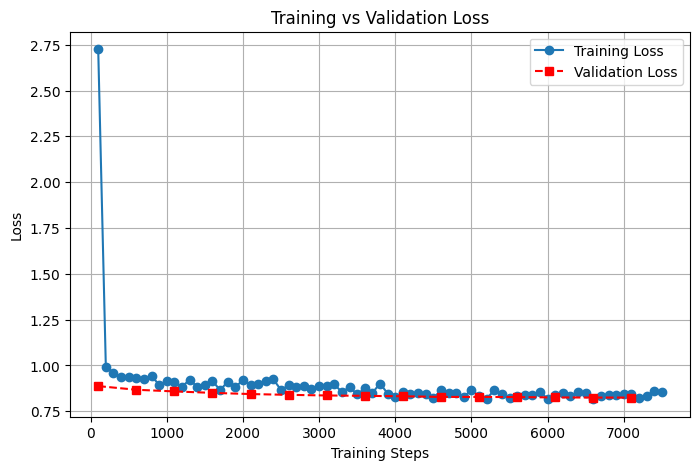

In [29]:
import matplotlib.pyplot as plt

# Extract loss values from trainer logs
train_losses = []
val_losses = []
steps = []

for log in trainer.state.log_history:
    if "loss" in log:  # Training loss
        train_losses.append(log["loss"])
        steps.append(log["step"])  # Store step number
    if "eval_loss" in log:  # Validation loss
        val_losses.append(log["eval_loss"])

# Ensure val_losses aligns with steps (since it's logged less frequently)
val_steps = steps[::len(steps) // len(val_losses)]

# Plot the losses
plt.figure(figsize=(8, 5))
plt.plot(steps, train_losses, label="Training Loss", marker="o")
plt.plot(val_steps, val_losses, label="Validation Loss", marker="s", linestyle="--", color="red")

plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid()
plt.show()


In [30]:
# Evaluate on a subset after training
subset_val_dataset = val_dataset.select(range(10000))
eval_results = trainer.evaluate(eval_dataset=subset_val_dataset)
print(f"Validation ROUGE scores: {eval_results}")

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step 7500: {'eval_loss': 0.8243939280509949, 'eval_runtime': 124.9897, 'eval_samples_per_second': 80.007, 'eval_steps_per_second': 5.0, 'epoch': 2.0}
Validation ROUGE scores: {'eval_loss': 0.8243939280509949, 'eval_runtime': 124.9897, 'eval_samples_per_second': 80.007, 'eval_steps_per_second': 5.0, 'epoch': 2.0}


In [31]:
test_results = trainer.evaluate(test_dataset)
print(f"Test Loss: {test_results['eval_loss']}")


Step 7500: {'eval_loss': 0.8094428181648254, 'eval_runtime': 124.5911, 'eval_samples_per_second': 80.263, 'eval_steps_per_second': 5.016, 'epoch': 2.0}
Test Loss: 0.8094428181648254


In [32]:
def generate_titles_sampling(text, num_titles=3):
    input_text = "generate title: " + text
    input_ids = tokenizer(input_text, return_tensors="pt").input_ids.to(model.device)
    
    outputs = model.generate(
        input_ids, 
        max_length=32, 
        num_return_sequences=num_titles, 
        do_sample=True, 
        top_k=50, 
        top_p=0.95, 
        temperature=0.7
    )

    titles = [tokenizer.decode(output, skip_special_tokens=True) for output in outputs]
    return titles


In [33]:
story = "Lena found an old key buried in her backyard. That night, she dreamed of a hidden door beneath the oak tree. Curious, she searched and uncovered a rusty lock. As she turned the key, a golden light spilled out, revealing a staircase leading down. A whisper echoed, “Welcome back, Guardian.” Heart pounding, Lena stepped inside, realizing her destiny had just begun."
titles =  generate_titles_sampling(story)
print(titles)


['a whisper of light', 'the gate behind the oak tree', 'the golden light']


In [34]:
story = """The summer heat had freckled his cheeks after all these years. He looked himself in the mirror and smiled. And then sobbed. Coco barked as if he missed her too. "We all loved her buddy, but she is happier now." he told Coco, giving him a hug. He touched his freckles again, just the way his used to touch his mothers cheeks with the same freckles."""
titles =  generate_titles_sampling(story)
print(titles)


['the freckled cheeks of coco', 'the crows', 'the freckles in my cheeks']


In [35]:
import shutil

model_dir = "/kaggle/working/results/checkpoint-7000"
zip_filename = "Model_1_80"

shutil.make_archive(zip_filename, 'zip', model_dir)

print(f"Model zipped successfully: {zip_filename}")

Model zipped successfully: Model_1_80
